In [5]:
from PIL import Image, ImageDraw, ImageTk, ImageChops, ImageOps
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import os
import numpy as np

In [2]:
# a canvas to display the image
root = tk.Tk()
canvas = tk.Canvas(root, width=500, height=500)
canvas.pack()
root.title("Masquerade")


ico = Image.open(r"C:\Users\padams\Desktop\Porsche\tk_icon_cat.JPG")
photo = ImageTk.PhotoImage(ico)
root.wm_iconphoto(False, photo)



# # Create a label for the canvas
# canvas_label = ttk.Label(root, text="Fault Label Maker", style='Bold.TLabel')
# canvas_label.pack()

# Allow the user to select an image file
def select_image():
    canvas.delete('all')
    file_path = filedialog.askopenfilename()
    img = Image.open(file_path)
    canvas.img = img
    canvas.image = ImageTk.PhotoImage(img)
    canvas.create_image(0, 0, image=canvas.image, anchor='nw')

# Creates a drawing area on top of the image
def draw(event):
    x, y = event.x, event.y
    r = 1.6
#     r = float(r_var.get())
    canvas.create_oval(x-r, y-r, x+r, y+r, fill='black', outline='black')
    
def delete(event):
    for item in canvas.find_all():
        if canvas.type(item) == 'oval':
            coords = canvas.coords(item)
            x1, y1, x2, y2 = coords[0], coords[1], coords[2], coords[3]
            if x1 <= event.x <= x2 and y1 <= event.y <= y2:
                canvas.delete(item)    

canvas.bind('<B1-Motion>', draw)
canvas.bind('<B3-Motion>', delete)


def save_mask():
    
    global binary_mask_path
    
    img = canvas.img
    draw = ImageDraw.Draw(img)
    for item in canvas.find_all():
        if canvas.type(item) == 'oval':
            coords = canvas.coords(item)
            x1, y1, x2, y2 = coords[0], coords[1], coords[2], coords[3]
            draw.ellipse((x1, y1, x2, y2), fill=(0, 255, 0))

    # Get the directory and filename of the original image
    img_filename = os.path.basename(img.filename)
    img_dirname = os.path.dirname(img.filename)

    # Construct the filename for the mask
    mask_filename = os.path.splitext(img_filename)[0] + '_mask.png'
    mask_path = os.path.join(img_dirname, 'masks', mask_filename)

    # Create the masks directory if it doesn't exist
    masks_dir = os.path.join(img_dirname, 'masks')
    if not os.path.exists(masks_dir):
        os.makedirs(masks_dir)

 
    img.save(mask_path)

    # Save the mask image as a numpy array
    mask_array = np.array(img)
    mask_array = mask_array[:,:,0] # Convert to grayscale
    mask_array = np.expand_dims(mask_array, axis=2) # Add a third dimension
    mask_array = mask_array.astype(np.uint8) # Convert to unsigned integer
    mask_filename = os.path.splitext(img_filename)[0] + '_mask.npy'
    mask_path = os.path.join(img_dirname, 'npy_masks', mask_filename)
    
    # Create the masks directory if it doesn't exist
    npy_masks_dir = os.path.join(img_dirname, 'npy_masks')
    if not os.path.exists(npy_masks_dir):
        os.makedirs(npy_masks_dir)
        
    np.save(mask_path, mask_array)
    
    #Create binary masks 
    label_color = (0, 255, 0) #Green
    
    binary_data = []
    for y in range(grayscale_image.height):
        for x in range(grayscale_image.width):
            pixel = img.getpixel((x, y))
            if pixel == label_color:
                binary_data.append(255)
            else:
                binary_data.append(0)

    binary_image = Image.new('L', (grayscale_image.width, grayscale_image.height))
    binary_image.putdata(binary_data)

    binary_mask_filename = os.path.splitext(img_filename)[0] + '_maskb.png'
    binary_mask_path = os.path.join(img_dirname, 'binary_masks', binary_mask_filename)

    binary_masks_dir = os.path.join(img_dirname, 'binary_masks')
    if not os.path.exists(binary_masks_dir):
        os.makedirs(binary_masks_dir)


    binary_image.save(binary_mask_path)
        
    # Display a message box to confirm that the mask was saved
    msg = 'Saved!'
    tk.messagebox.showinfo(title='Mask Saved', message=msg)

#     # Add a button to change the pixel width
# def change_pixel_width(width):
#     global r
#     r = width

# pixel_width_button = tk.Button(root, text='Change Pixel Width', command=lambda: change_pixel_width(3))
# pixel_width_button.pack()
    
# Add buttons to select an image and save the mask
select_button = tk.Button(root, text='Select Image', command=select_image,bd = 3,activebackground = 'blue')
select_button.pack()

save_button = tk.Button(root, text='Save Mask', command=save_mask, bd = 3, activebackground = 'blue')
save_button.pack()


root.mainloop()



Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-2-22e8d5e8afce>", line 94, in save_mask
    for y in range(grayscale_image.height):
NameError: name 'grayscale_image' is not defined


In [3]:
# a canvas to display the image
root = tk.Tk()
canvas = tk.Canvas(root, width=500, height=500)
canvas.pack()
root.title("Masquerade")

ico = Image.open(r"C:\Users\padams\Desktop\Porsche\tk_icon_cat.JPG")
photo = ImageTk.PhotoImage(ico)
root.wm_iconphoto(False, photo)

# Allow the user to select an image file
def select_image():
    canvas.delete('all')
    file_path = filedialog.askopenfilename()
    img = Image.open(file_path)
    canvas.img = img
    canvas.image = ImageTk.PhotoImage(img)
    canvas.create_image(0, 0, image=canvas.image, anchor='nw')

# Creates a drawing area on top of the image
def draw(event):
    x, y = event.x, event.y
    r = 1.6
    canvas.create_oval(x-r, y-r, x+r, y+r, fill='black', outline='black')
    
def delete(event):
    for item in canvas.find_all():
        if canvas.type(item) == 'oval':
            coords = canvas.coords(item)
            x1, y1, x2, y2 = coords[0], coords[1], coords[2], coords[3]
            if x1 <= event.x <= x2 and y1 <= event.y <= y2:
                canvas.delete(item)    

canvas.bind('<B1-Motion>', draw)
canvas.bind('<B3-Motion>', delete)


def save_mask():
    
    global binary_mask_path
    
    img = canvas.img
    draw = ImageDraw.Draw(img)
    for item in canvas.find_all():
        if canvas.type(item) == 'oval':
            coords = canvas.coords(item)
            x1, y1, x2, y2 = coords[0], coords[1], coords[2], coords[3]
            draw.ellipse((x1, y1, x2, y2), fill=(0, 255, 0))

    # Get the directory and filename of the original image
    img_filename = os.path.basename(img.filename)
    img_dirname = os.path.dirname(img.filename)

    # Construct the filename for the mask
    mask_filename = os.path.splitext(img_filename)[0] + '_mask.png'
    mask_path = os.path.join(img_dirname, 'masks', mask_filename)

    # Create the masks directory if it doesn't exist
    masks_dir = os.path.join(img_dirname, 'masks')
    if not os.path.exists(masks_dir):
        os.makedirs(masks_dir)

 
    img.save(mask_path)

    # Save the mask image as a numpy array
    mask_array = np.array(img)
    mask_array = mask_array[:,:,0] # Convert to grayscale
    mask_array = np.expand_dims(mask_array, axis=2) # Add a third dimension
    mask_array = mask_array.astype(np.uint8) # Convert to unsigned integer
    mask_filename = os.path.splitext(img_filename)[0] + '_mask.npy'
    mask_path = os.path.join(img_dirname, 'npy_masks', mask_filename)
    
    # Create the masks directory if it doesn't exist
    npy_masks_dir = os.path.join(img_dirname, 'npy_masks')
    if not os.path.exists(npy_masks_dir):
        os.makedirs(npy_masks_dir)
        
    np.save(mask_path, mask_array)
    
    #Create binary masks 
    label_color = (0, 255, 0) #Green
    
#     binary_data = []
#     for y in range(grayscale_image.height):
#         for x in range(grayscale_image.width):
#             pixel = img.getpixel((x, y))
#             if pixel == label_color:
#                 binary_data.append(255)
#             else:
#                 binary_data.append(0)

#     binary_image = Image.new('L', (grayscale_image.width, grayscale_image.height))
#     binary_image.putdata(binary_data)

    binary_data = []
    for y in range(img.height):
        for x in range(img.width):
            pixel = img.getpixel((x, y))
            if pixel == label_color:
                binary_data.append(255)
            else:
                binary_data.append(0)

    binary_image = Image.new('L', (img.width, img.height))
    binary_image.putdata(binary_data)
    
    binary_mask_filename = os.path.splitext(img_filename)[0] + '_maskb.png'
    binary_mask_path = os.path.join(img_dirname, 'binary_masks', binary_mask_filename)

    binary_masks_dir = os.path.join(img_dirname, 'binary_masks')
    if not os.path.exists(binary_masks_dir):
        os.makedirs(binary_masks_dir)


    binary_image.save(binary_mask_path)
        
    # Display a message box to confirm that the mask was saved
    msg = 'Saved!'
    tk.messagebox.showinfo(title='Mask Saved', message=msg)
    
# Add buttons to select an image and save the mask
select_button = tk.Button(root, text='Select Image', command=select_image)
select_button.pack()

save_button = tk.Button(root, text='Save Mask', command=save_mask)
save_button.pack()


root.mainloop()

## testing turning annotations into binary masks 

In [37]:
import matplotlib.pyplot as plt

In [38]:
annotated_image = Image.open(r"path_to_image")

In [39]:
label_color = (0, 255, 0) #Green

In [41]:
binary_data = []
for y in range(grayscale_image.height):
    for x in range(grayscale_image.width):
        pixel = annotated_image.getpixel((x, y))
        if pixel == label_color:
            binary_data.append(255)
        else:
            binary_data.append(0)

binary_image = Image.new('L', (grayscale_image.width, grayscale_image.height))
binary_image.putdata(binary_data)

In [43]:
# Invert the binary mask (if needed)
# inverted_image = ImageOps.invert(binary_image)

Text(0.5, 1.0, 'Binary Mask')

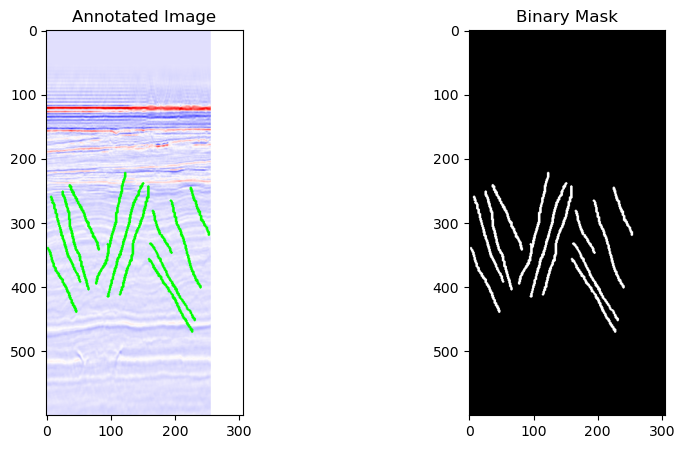

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(annotated_image)
axs[0].set_title("Annotated Image")
axs[1].imshow(binary_image, cmap='gray')
axs[1].set_title("Binary Mask")